In [1]:
credit_data_sample<- read.csv("M:\\Imarticus\\ProjectR\\Credit card fraud\\Datafiles\\credit_data_sample.csv", header = TRUE,
                              stringsAsFactors = TRUE,
                              strip.white = FALSE ,
                              sep = ',')
credit_data_sample$Class= as.factor(credit_data_sample$Class)
summary(credit_data_sample)

      Time              V1                 V2                 V3          
 Min.   :    74   Min.   :-34.0920   Min.   :-28.4166   Min.   :-31.1037  
 1st Qu.: 53545   1st Qu.: -1.4304   1st Qu.: -0.4331   1st Qu.: -1.9609  
 Median : 85384   Median : -0.3602   Median :  0.3457   Median : -0.3012  
 Mean   : 93333   Mean   : -1.1413   Mean   :  0.8450   Mean   : -1.7165  
 3rd Qu.:138917   3rd Qu.:  1.2040   3rd Qu.:  1.3351   3rd Qu.:  0.7730  
 Max.   :172742   Max.   :  2.3695   Max.   : 22.0577   Max.   :  3.2605  
       V4                V5                 V6                V7          
 Min.   :-4.0405   Min.   :-22.1055   Min.   :-6.4063   Min.   :-43.5572  
 1st Qu.:-0.6718   1st Qu.: -1.0614   1st Qu.:-1.0812   1st Qu.: -1.1413  
 Median : 0.3780   Median : -0.1888   Median :-0.4465   Median : -0.1318  
 Mean   : 1.0659   Mean   : -0.7373   Mean   :-0.3441   Mean   : -1.3699  
 3rd Qu.: 1.8363   3rd Qu.:  0.5682   3rd Qu.: 0.2602   3rd Qu.:  0.4781  
 Max.   :12.6728   Max.  

In [2]:
library(dplyr)
var1<-select(credit_data_sample,c(1:30))
var2<-credit_data_sample$Class
library(e1071)
svm_model<-svm(Class~V4+V10+V12+V14,data=credit_data_sample)
summary(svm_model)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Call:
svm(formula = Class ~ V4 + V10 + V12 + V14, data = credit_data_sample)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  203

 ( 97 106 )


Number of Classes:  2 

Levels: 
 0 1




In [3]:
pred <- predict(svm_model,var1)
table(pred,var2)
nrow(var1)

    var2
pred    0    1
   0 1501   68
   1    5  424

[1] 1998

In [4]:

library(caTools)

split = sample.split(credit_data_sample$Class, SplitRatio = .8)
training_data = subset(credit_data_sample, split == TRUE)
test_data = subset(credit_data_sample, split == FALSE)
nrow(training_data)
nrow(test_data)

[1] 1599

[1] 399

In [5]:
svm_mod = svm(Class~V4+V10+V12+V14, data = training_data,
                  type = 'C-classification', kernel = 'radial')
summary(svm_mod)


Call:
svm(formula = Class ~ V4 + V10 + V12 + V14, data = training_data, 
    type = "C-classification", kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  173

 ( 80 93 )


Number of Classes:  2 

Levels: 
 0 1




In [6]:
test_pred = predict(svm_mod, test_data[,-31])
table(test_pred,test_data$Class)

         
test_pred   0   1
        0 299  12
        1   2  86

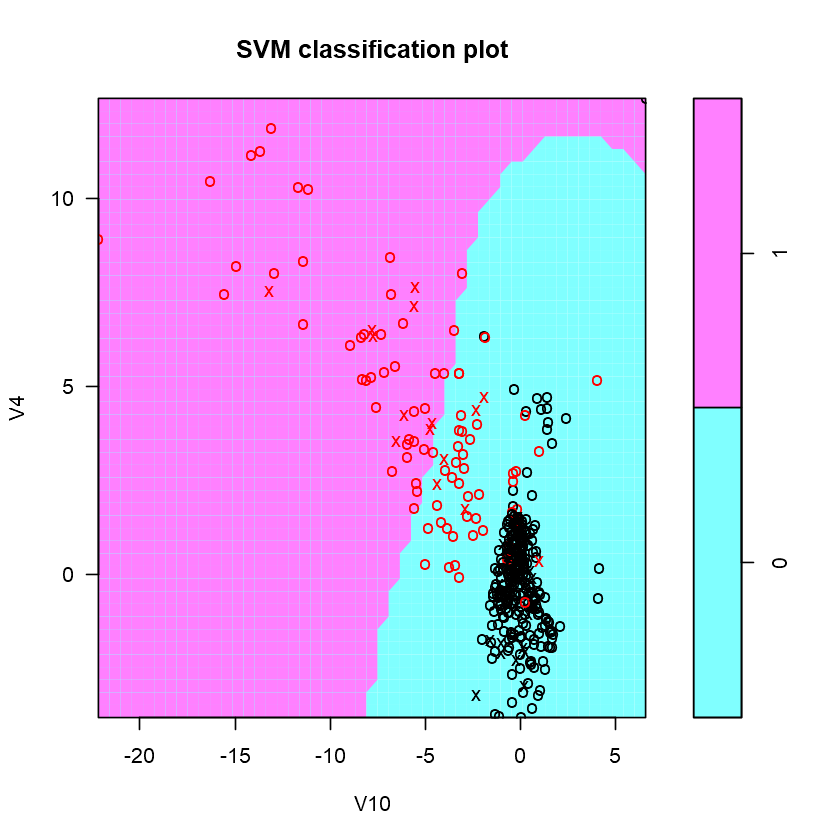

In [7]:
plot(svm_mod,test_data,V4~V10)

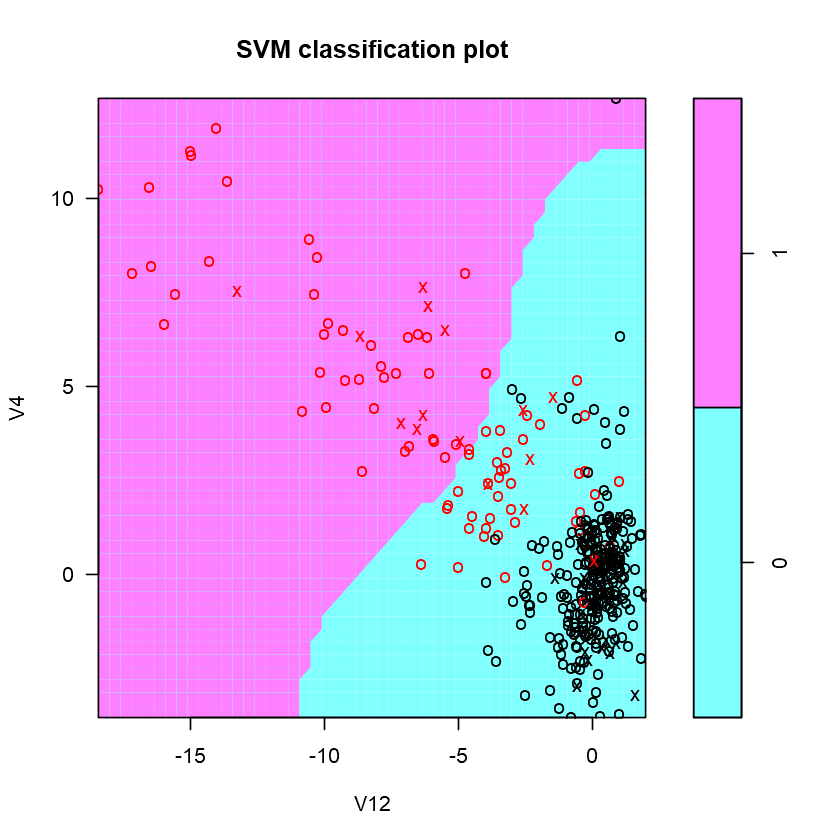

In [8]:
plot(svm_mod,test_data,V4~V12)

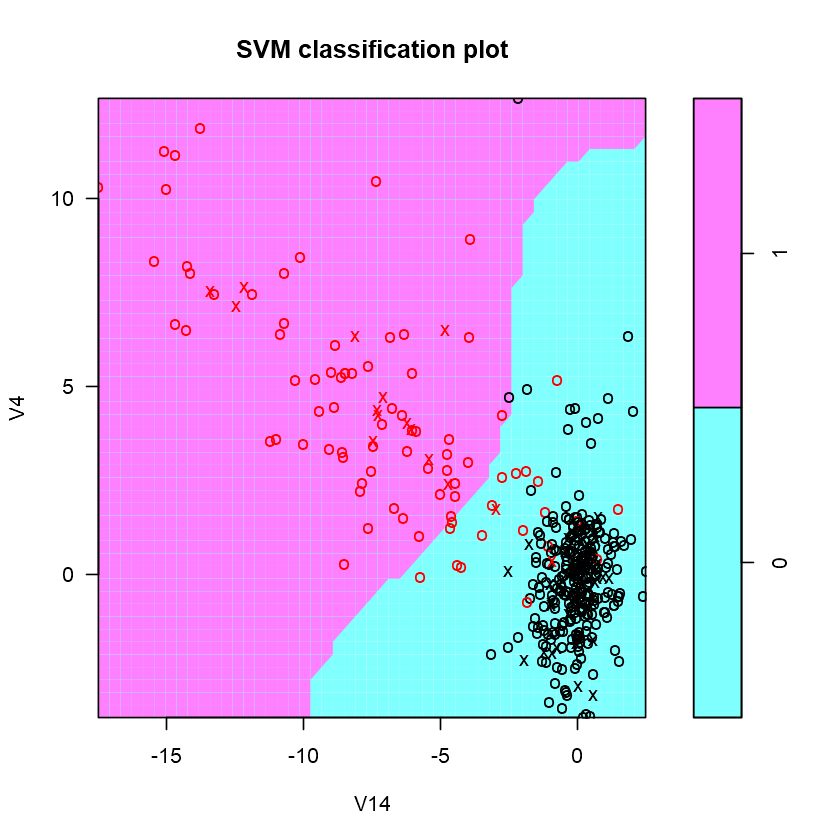

In [9]:
plot(svm_mod,test_data,V4~V14)

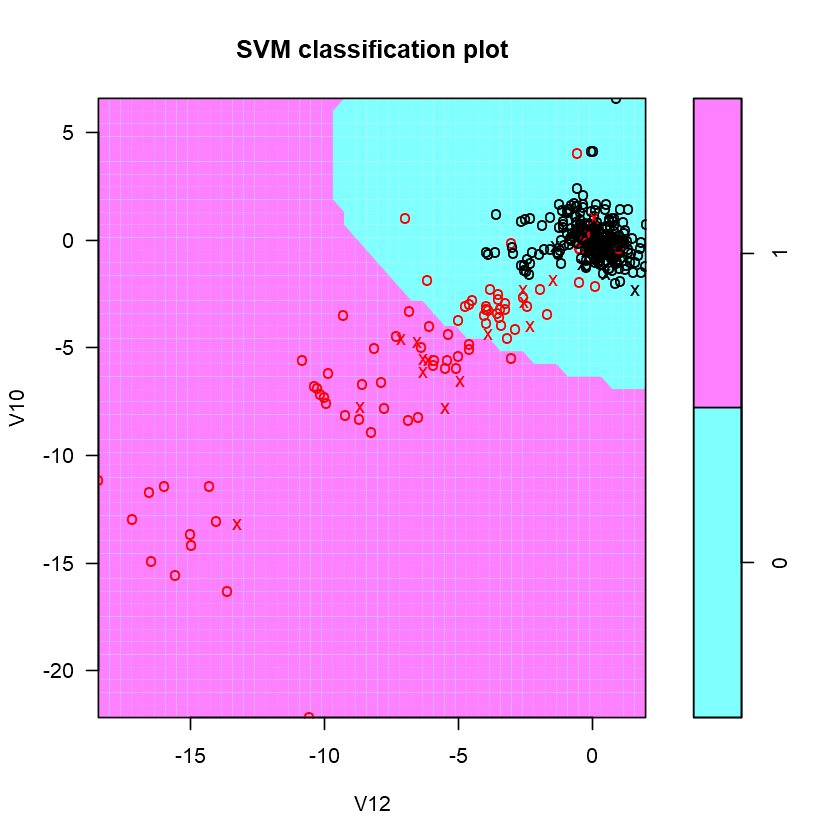

In [11]:
plot(svm_mod,test_data,V10~V12)

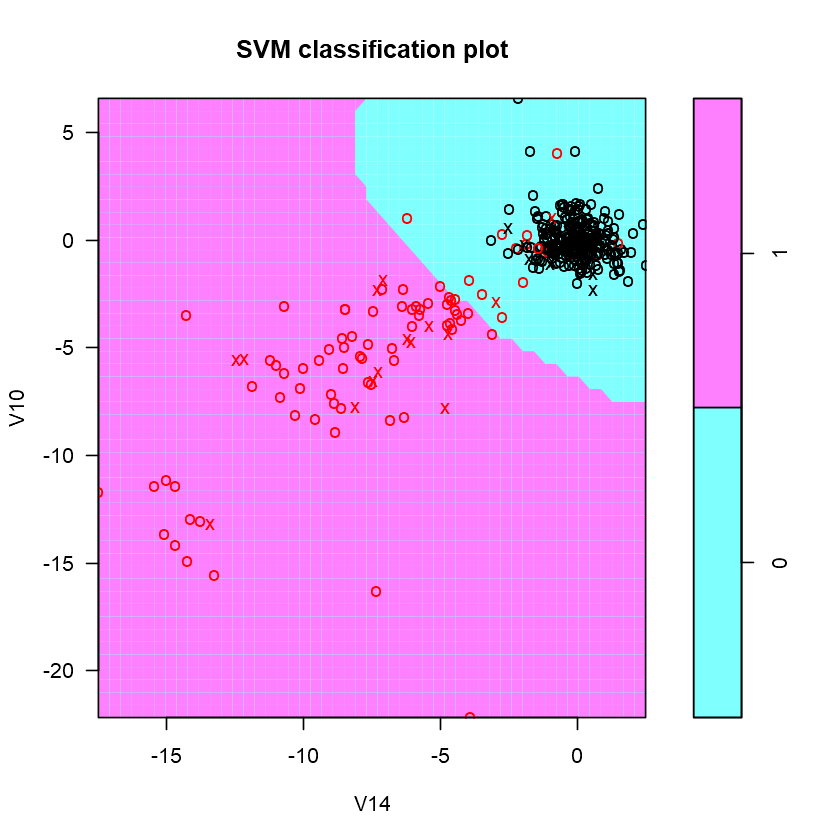

In [12]:
plot(svm_mod,test_data,V10~V14)

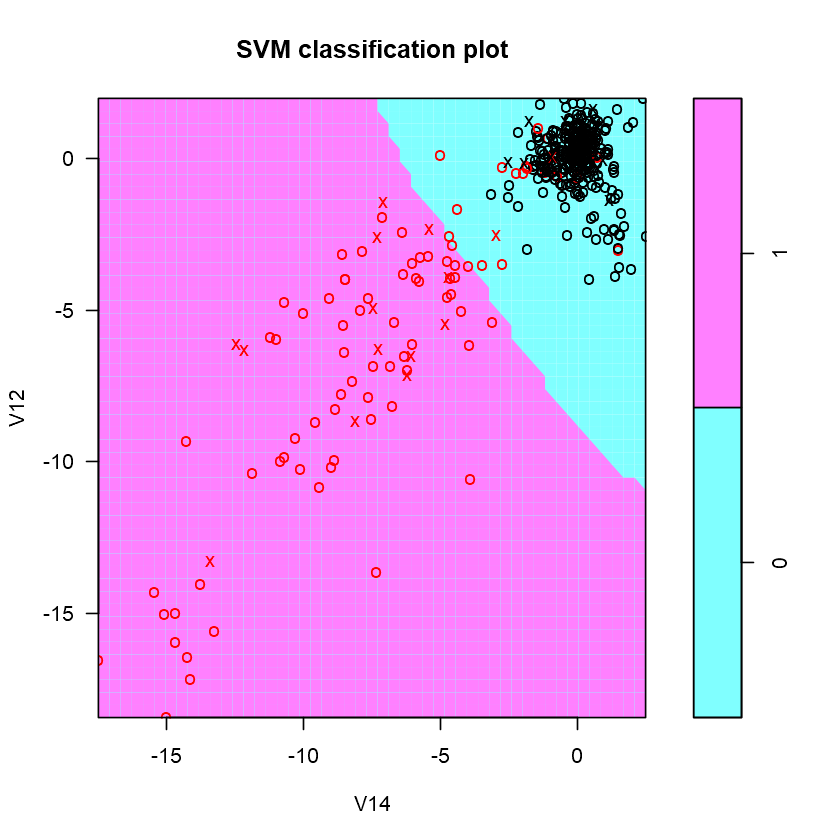

In [13]:
plot(svm_mod,test_data,V12~V14)

In [14]:
# Reading complete file
library(readr)
credit_data<- read.csv("M:\\Imarticus\\data sets\\Text mining\\creditcard.csv", header = TRUE,
                       stringsAsFactors = TRUE,
                       strip.white = FALSE ,
                       sep = ',')


In [19]:
table(credit_data$Class)


     0      1 
284315    492 

In [20]:
#Testing on complete data
pred_data = predict(svm_mod, credit_data[,-31])
table(pred_data,credit_data$Class)

         
pred_data      0      1
        0 282984     68
        1   1331    424

In [36]:
#conclusions on given data as per SVM classification plots. 
# 1. If V10<=-8 and V4 is between -4 to 12 definitely chance their is a chance of fraud i.e Class=1.
# 2. If V12<=-12 and V4 is between -4 to 12 definitely chance their is a chance of fraud i.e Class=1.
# 3. If V14<=-10 and V4 is between -4 to 12 definitely chance their is a chance of fraud i.e Class=1.
# 4. If V10<=-8 and V12 is between -18 to 4 definitely chance their is a chance of fraud i.e Class=1.
# 5. If V10<=-8 and V14 is between -19 to 6 definitely chance their is a chance of fraud i.e Class=1.
# 6. If V14<=-8 and V12 is between -18 to 4 definitely chance their is a chance of fraud i.e Class=1.